# Phase 7 — Integration & Synthesis  

**Project:** Dynamic Financial Risk Modeling  
**Dataset:** S&P 500 Index (stooq.pl)  
**Time Span:** 2000–2025  

---

## Objective

The goal of this phase is to integrate all modeling results from Phases 1–6 into a unified analytical narrative.  
Rather than introducing new statistical methods, this phase synthesizes volatility dynamics, tail risk behavior, time–frequency structure, and Bayesian uncertainty to provide a coherent, regime-aware understanding of financial risk.

---

## Scope of Integration

This phase consolidates insights from the full modeling pipeline:

- **Volatility dynamics** captured via GARCH-family models  
- **Extreme tail behavior** quantified using Extreme Value Theory  
- **Nonstationary and multiscale structure** revealed through time–frequency analysis  
- **Probabilistic uncertainty and model adequacy** assessed using Bayesian inference  

The objective is not to identify a single “best” model, but to demonstrate how different statistical frameworks illuminate complementary dimensions of market risk.

---

## Guiding Research Question

> **How does financial market risk evolve across regimes, scales, and uncertainty layers, and what are the implications for risk-aware decision-making?**

---

## Structure of This Phase

This notebook is organized as a research-style synthesis, progressing from regime identification to risk implications:

1. Conceptual segmentation of market regimes  
2. Volatility behavior across regimes  
3. Tail risk comparison under different market states  
4. Time–frequency evidence of nonstationarity and regime change  
5. Bayesian uncertainty and model adequacy  
6. Implications for portfolio risk management  

---

### Note on Methodology

No new models are estimated in this phase.  
All results are drawn from validated outputs in Phases 1–6 and reinterpreted through an integrated, regime-aware lens.

---

## 1. Data & Pipeline Overview

This analysis is conducted using daily log returns of the S&P 500 index, constructed from open-access price data obtained via stooq.pl. The sample spans January 2000 to December 2025, covering multiple market cycles and major financial stress events.

A single cleaned and standardized dataset is used consistently across all phases of the project. Log returns are computed from closing prices and serve as the primary input for volatility modeling, tail-risk analysis, time–frequency decomposition, and Bayesian inference. No additional filtering or reprocessing is performed in later phases, ensuring a coherent and reproducible data pipeline.

The analytical workflow is structured sequentially:

- **Phases 1–2** establish data integrity and empirical stylized facts, motivating dynamic and non-Gaussian risk models.
- **Phase 3** models time-varying conditional volatility using GARCH-family specifications.
- **Phase 4** quantifies extreme downside risk through Extreme Value Theory.
- **Phase 5** examines nonstationary and multiscale structure using time–frequency analysis.
- **Phase 6** introduces Bayesian inference to quantify uncertainty and assess model adequacy.

This integrated pipeline allows each modeling framework to address a distinct dimension of financial risk while maintaining internal consistency. Phase 7 builds upon these validated components to synthesize regime-dependent insights and decision-relevant interpretations.

---

## 2. Market Regimes: Conceptual Segmentation

Financial markets do not operate under a single, homogeneous risk environment. Periods of relative stability alternate with episodes of heightened uncertainty, extreme volatility, and structural stress. In this project, such differences are referred to as *market regimes*.

Importantly, regimes are not treated here as fixed or deterministic states, nor are they identified through hard clustering or regime-switching models. Instead, regimes are defined **conceptually and descriptively**, based on empirically observable differences in risk dynamics established in earlier phases.

### Regime Definition

Market regimes are defined using the estimated conditional volatility from the preferred GARCH-family specification (GJR-GARCH). Conditional volatility serves as a latent summary of market risk, capturing persistence, clustering, and asymmetric responses to shocks.

The volatility series is partitioned into regimes according to its empirical distribution:

- **Low-volatility regime:** periods where conditional volatility lies in the lower quantiles of its distribution  
- **Medium-volatility regime:** periods of intermediate volatility, representing transitional market conditions  
- **High-volatility regime:** periods where conditional volatility lies in the upper quantiles, typically associated with market stress and crises  

This quantile-based segmentation is intentionally simple and transparent. It avoids imposing strong parametric assumptions or claiming formal regime detection, while still allowing meaningful comparison of risk behavior across distinct volatility states.

### Conceptual Role of Regimes

This regime framework provides a unifying structure for integrating results from previous phases:

- **Volatility models (Phase 3)** motivate regime persistence and clustering  
- **Extreme Value Theory (Phase 4)** suggests that tail behavior may differ across volatility states  
- **Time–frequency analysis (Phase 5)** indicates that regime changes are localized in time and scale  
- **Bayesian inference (Phase 6)** highlights uncertainty in regime boundaries and risk estimates  

Rather than treating regimes as latent states to be estimated precisely, they are used here as an **organizational lens** through which volatility, tail risk, dependence structure, and uncertainty can be compared coherently.

### Scope and Limitations

This segmentation is descriptive rather than causal. Regime boundaries are not interpreted as structural breaks, policy changes, or exogenous shocks. Instead, they reflect **empirical differences in observed risk conditions**.

This conservative approach ensures that subsequent analyses focus on **how risk behaves across regimes**, rather than attempting to explain *why* regimes occur. Such explanatory modeling is left as a natural extension for future research.

In the following sections, this regime framework is used consistently to compare volatility dynamics, extreme risk measures, time–frequency structure, and Bayesian uncertainty.

---

## 3. Volatility Across Regimes

Volatility dynamics provide the first quantitative anchor for regime-dependent risk behavior. Building on the results of Phase 3, conditional volatility is modeled using the GJR-GARCH(1,1) specification, which was selected for its superior empirical performance and its ability to capture asymmetric shock responses in equity markets.

Consistent with established properties of financial time series, the estimated volatility process exhibits pronounced clustering and strong persistence, with high-volatility periods forming prolonged episodes rather than occurring in isolation. Negative return shocks exert a disproportionately larger impact on future volatility than positive shocks of comparable magnitude, reinforcing the importance of leverage effects in modeling market risk.

These characteristics motivate the regime segmentation introduced in Section 2. Rather than imposing exogenous breakpoints, volatility regimes are defined endogenously using empirical quantiles of the conditional volatility distribution. This approach allows distinct low-, medium-, and high-volatility regimes to emerge naturally from the data.

High-volatility regimes are characterized by sustained elevations in σₜ, reflecting heightened market uncertainty and amplified sensitivity to adverse shocks. In contrast, low-volatility regimes correspond to relatively stable and subdued risk conditions, while medium-volatility regimes capture transitional states between these extremes.

Importantly, the same underlying market generates qualitatively different risk environments over time. Volatility is therefore best understood as a latent, state-dependent process rather than a static characteristic of the return distribution. While GARCH-type models provide a dynamic representation of second-moment behavior, they do not fully characterize the severity of rare but extreme losses.

This volatility-based regime structure serves as a foundation for the subsequent analysis, enabling systematic comparison of tail risk behavior, dependence structure, and uncertainty across distinct market states.

---

### Visualization Note

The following figure reproduces the estimated conditional volatility obtained in Phase 3.  
Rather than re-estimating the model, the figure is loaded directly from a previously generated output to preserve consistency with earlier results.

The image is displayed using a lightweight plotting routine for clarity and reproducibility. This choice is purely presentational and does not affect the underlying analysis or interpretation.

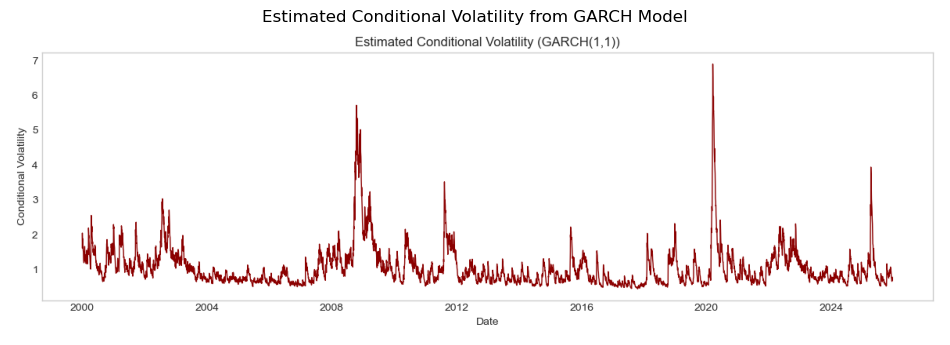

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../figures/phase3_conditional_volatility.png")
plt.figure(figsize=(12,4))
plt.imshow(img)
plt.axis("off")
plt.title("Estimated Conditional Volatility from GARCH Model")
plt.show()

**Interpretation.**  
The estimated conditional volatility series exhibits pronounced clustering and persistence, with elevated volatility episodes forming prolonged regimes rather than isolated spikes. Periods of heightened volatility coincide with sustained market stress, while tranquil periods display relatively stable and subdued volatility levels.

Several distinct high-volatility episodes are evident, corresponding to the high-volatility regimes identified in Section 2 and most notably during major market disruptions, where volatility increases sharply and remains elevated for extended durations. In contrast, low-volatility regimes are characterized by gradual mean reversion and limited short-term fluctuation, reflecting more stable market conditions.

The persistence observed in the volatility process supports the regime-based segmentation adopted in this analysis. Rather than transitioning smoothly across states, the market tends to remain within a given volatility regime for extended periods before shifting to a qualitatively different risk environment.

These dynamics reinforce the interpretation of volatility as a latent, state-dependent process and motivate the subsequent examination of how extreme tail risk, dependence structure, and uncertainty differ across volatility regimes.

---

## 4. Tail Risk Across Regimes

Volatility dynamics characterize the persistence and intensity of market fluctuations, but they do not fully describe the severity of extreme downside outcomes. To address this limitation, tail risk is examined through the lens of Extreme Value Theory (EVT), as established in Phase 4.

The EVT analysis confirms that the distribution of S&P 500 losses exhibits heavy-tailed behavior, as indicated by a positive tail index. This implies that extreme losses decay more slowly than predicted by Gaussian models and that rare but severe events contribute disproportionately to overall risk.

By modeling threshold exceedances using a Peaks-Over-Threshold framework with the Generalized Pareto Distribution, EVT enables extrapolation beyond observed quantiles and provides coherent estimates of Value-at-Risk (VaR) and Expected Shortfall (ES). In particular, Expected Shortfall captures the magnitude of losses conditional on extreme events occurring, making it especially relevant during periods of market stress.

Although EVT models are estimated globally, their interpretation is inherently regime-dependent. High-volatility regimes identified in Section 3 are associated with a greater frequency of extreme loss exceedances and a larger contribution of tail events to aggregate risk. In contrast, during low-volatility regimes, tail risk is less pronounced but remains systematically underestimated by Gaussian assumptions.

This distinction highlights a critical insight: tail risk is not a simple function of volatility magnitude. While volatility signals the likelihood of turbulent periods, EVT quantifies the severity of losses once extreme conditions materialize. Together, these perspectives provide a more complete characterization of regime-dependent financial risk.

The presence of heavy-tailed losses across regimes motivates the need to understand not only how extreme risk is distributed, but also when it intensifies and how it evolves over time and across scales. These questions are addressed in the subsequent time–frequency analysis.

---

## 5. Time–Frequency Evidence of Regime Change

While volatility and tail-risk models characterize the magnitude and severity of market risk, they remain limited to the time domain. To examine how risk evolves jointly across time and temporal scales, a time–frequency analysis is conducted using the Short-Time Fourier Transform (STFT), as developed in Phase 5.

Applying STFT to the conditional volatility series reveals pronounced nonstationarity in the spectral structure of market risk. Rather than exhibiting a stable frequency signature, volatility energy concentrates in localized regions of the time–frequency plane, corresponding to distinct market regimes.

The spectrogram shows a clear dominance of low-frequency components, indicating that volatility dynamics are governed by persistent, slowly evolving processes rather than high-frequency noise. During periods of market stress, spectral energy becomes broader and more intense, reflecting structural regime shifts rather than transient fluctuations.

These findings provide complementary evidence to the regime segmentation introduced earlier. High-volatility regimes are associated not only with elevated volatility levels, but also with changes in the temporal scale at which risk operates. Market instability therefore manifests simultaneously in magnitude, persistence, and frequency structure.

Time–frequency analysis thus bridges volatility-based and tail-based perspectives, highlighting that financial risk is inherently multi-scale and nonstationary. This motivates the Bayesian analysis in the next section, which explicitly accounts for uncertainty and regime dependence in model-based inference.

---

### Visualization Note

The following figure reproduces the time–frequency representation of conditional volatility obtained in Phase 5.  
Rather than recomputing the transformation, the figure is loaded directly from a previously generated output to preserve consistency with earlier results.

The image is displayed using a lightweight plotting routine for clarity and reproducibility. This choice is purely presentational and does not affect the underlying analysis or interpretation.

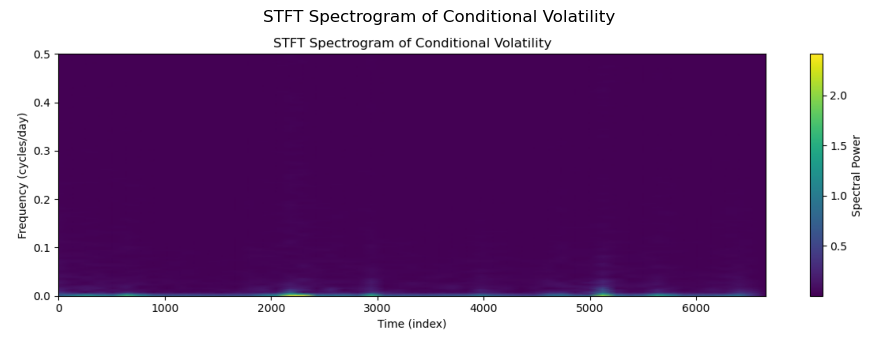

In [4]:
# Load STFT conditional volatility figure from Phase 5
img = mpimg.imread("../figures/phase5_stft_conditional_volatility.png")

plt.figure(figsize=(12, 4))
plt.imshow(img)
plt.axis("off")
plt.title("STFT Spectrogram of Conditional Volatility")
plt.show()

**Interpretation.**  
The time–frequency representation of conditional volatility reveals pronounced nonstationarity in the spectral structure of market risk. Rather than exhibiting a stable frequency signature, volatility energy is concentrated in localized regions of the time–frequency plane, corresponding to distinct market regimes.

Across the sample, spectral power is dominated by low-frequency components, indicating that volatility dynamics are governed primarily by persistent, slowly evolving processes rather than high-frequency noise. This pattern is consistent with volatility clustering and supports the interpretation of regimes as sustained latent states.

During periods of elevated market stress, spectral energy intensifies and broadens, reflecting structural shifts in the temporal scale of risk rather than transient fluctuations. These changes align with high-volatility regimes identified earlier, providing complementary evidence that regime transitions involve both changes in magnitude and changes in temporal structure.

Overall, the time–frequency analysis demonstrates that financial risk evolves across multiple time scales and cannot be fully characterized by time-domain or tail-based models alone. This multi-scale, nonstationary behavior motivates the Bayesian analysis in the next section, which explicitly accounts for uncertainty and regime dependence in model-based inference.

---

## 6. Bayesian Inference and Uncertainty Across Regimes

While previous sections characterize volatility dynamics, tail risk severity, and time–frequency structure, they remain largely descriptive. Bayesian modeling provides a complementary framework by explicitly quantifying uncertainty and learning regime behavior probabilistically.

Building on Phase 6, Bayesian autoregressive models are used as transparent baselines for uncertainty-aware inference. Posterior distributions over model parameters capture estimation uncertainty directly, while principled model comparison via PSIS-LOO demonstrates that incorporating weak autoregressive structure improves predictive performance relative to purely noise-driven specifications.

Beyond parameter uncertainty, Bayesian change-point detection provides explicit probabilistic evidence of structural breaks in volatility. Rather than inferring regimes indirectly from thresholds or spectral patterns, the model identifies likely regime transitions and quantifies uncertainty over their timing.

These results reinforce the conclusion that financial risk dynamics are inherently nonstationary and regime-dependent. Bayesian inference complements earlier volatility, EVT, and time–frequency analyses by unifying regime learning and uncertainty quantification within a coherent probabilistic framework.

---

### Visualization Note

The following figure reproduces the posterior distribution of the volatility change-point obtained in Phase 6.  
Rather than re-estimating the Bayesian model, the figure is loaded directly from a previously generated output to preserve consistency with earlier results.

The image is displayed using a lightweight plotting routine for clarity and reproducibility. This choice is purely presentational and does not affect the underlying inference or interpretation.

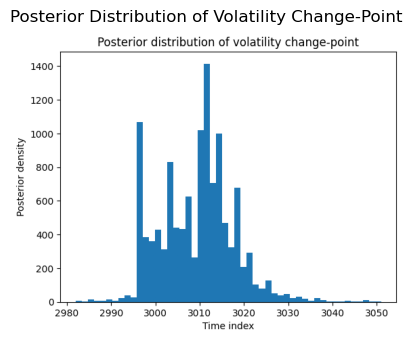

In [5]:
# Load Bayesian change-point posterior figure from Phase 6
img = mpimg.imread("../figures/phase6_volatility_changepoint_posterior.png")

plt.figure(figsize=(10, 4))
plt.imshow(img)
plt.axis("off")
plt.title("Posterior Distribution of Volatility Change-Point")
plt.show()

**Interpretation.**  
The posterior distribution of the volatility change-point exhibits a well-defined concentration over a narrow range of time indices, indicating strong probabilistic evidence for a structural break in volatility dynamics. Rather than identifying a single deterministic breakpoint, the Bayesian framework quantifies uncertainty over the timing of regime transitions.

The concentration of posterior mass suggests that the market transitioned into a distinct volatility regime over a relatively short temporal window, while the nonzero spread reflects residual uncertainty inherent in noisy financial data. This behavior is consistent with the view that regime changes are not instantaneous events but evolve over brief transition periods.

Importantly, the inferred change-point aligns with high-volatility regimes and structural shifts identified through GARCH-based volatility modeling and time–frequency analysis in earlier sections. This convergence across methodologies provides robust evidence that regime changes represent genuine alterations in the underlying risk-generating process rather than artifacts of a particular modeling choice.

Overall, Bayesian change-point inference complements threshold-based and spectral approaches by explicitly learning regime transitions and quantifying uncertainty over their timing. This reinforces the interpretation of financial risk as a nonstationary, regime-dependent process and highlights the value of probabilistic inference in dynamic risk modeling.

---

## 7. Portfolio & Decision Implications

The preceding analysis demonstrates that financial risk is inherently regime-dependent, nonstationary, and subject to substantial uncertainty. These findings carry important implications for portfolio construction and risk-sensitive decision-making, particularly in environments characterized by structural change and extreme events.

### Regime-Aware Risk Allocation

The identification of distinct volatility regimes implies that static portfolio allocations based on unconditional risk measures are fragile. During high-volatility regimes, risk exposure that appears acceptable under long-run averages may become excessive. Regime-aware allocation frameworks, in which exposure levels adapt to prevailing risk states, are therefore more robust than fixed strategies.

### Tail-Risk-Sensitive Constraints

Extreme Value Theory results highlight that volatility alone is insufficient to characterize downside risk. Expected Shortfall increases disproportionately during stressed regimes, indicating that losses escalate beyond what variance-based measures imply. Portfolio constraints based solely on volatility or Value-at-Risk may therefore underestimate true downside exposure. Incorporating tail-sensitive risk measures provides a more conservative and resilient basis for risk control, particularly during regime transitions.

### Horizon and Scale Alignment

Time–frequency analysis reveals that market risk operates across multiple temporal scales, with crisis periods exhibiting persistent low-frequency dominance and broadband spectral energy. This implies that portfolio decisions must align risk controls with the relevant investment horizon. Short-horizon risk management techniques may fail to capture slow-moving but persistent regimes, leading to delayed or ineffective responses during periods of sustained stress.

### Decision-Making Under Uncertainty

Bayesian inference emphasizes that both model parameters and regime boundaries are uncertain. Rather than relying on point estimates, robust decision-making should account for posterior uncertainty and acknowledge ambiguity in regime timing. Policies that remain effective across a range of plausible scenarios are preferable to those optimized for a single estimated state.

Overall, the integration of regime awareness, tail risk sensitivity, multi-scale dynamics, and uncertainty quantification supports a shift from static optimization toward adaptive, robustness-oriented portfolio decision frameworks. Such approaches are better suited to environments where risk evolves dynamically and extreme events play a central role.

---

## 8. Final Synthesis

This project developed an integrated framework for dynamic financial risk modeling by combining volatility modeling, extreme value theory, time–frequency analysis, and Bayesian inference. Rather than relying on a single modeling paradigm, the analysis demonstrated that financial risk is multi-dimensional, nonstationary, and fundamentally regime-dependent.

Volatility modeling provided a latent representation of market risk and revealed persistent regime structure. Extreme Value Theory complemented this perspective by quantifying the severity of rare but consequential losses, highlighting limitations of variance-based risk measures. Time–frequency analysis further showed that regime changes are not confined to shifts in magnitude, but are accompanied by structural changes in the temporal scale at which risk operates. Bayesian inference unified these insights by explicitly quantifying uncertainty and probabilistically identifying regime transitions.

Taken together, the results emphasize that financial risk cannot be adequately captured by static or unconditional models. Risk evolves across time, scale, and state, and meaningful inference requires tools that adapt to this complexity. The convergence of evidence across independent methodologies strengthens the conclusion that regime changes represent genuine structural features of financial markets rather than artifacts of individual modeling choices.

From a decision-making perspective, these findings motivate a shift toward regime-aware, uncertainty-sensitive frameworks that prioritize robustness over point-optimality. Such approaches are better suited to environments characterized by structural change and extreme events, where model uncertainty and tail behavior play a central role.

More broadly, this work illustrates how modern statistical methods can be integrated into a coherent risk modeling pipeline. The framework developed here provides a foundation for future extensions, including multivariate dependence modeling, dynamic portfolio optimization under regime uncertainty, and real-time regime monitoring. By emphasizing interpretability, uncertainty quantification, and methodological complementarity, this project aligns with contemporary research directions in financial risk and time-series analysis.

---

## 9. Future Work

The integrated framework developed in this project opens several natural directions for further research. These extensions aim to deepen the modeling of dependence, enhance decision relevance, and strengthen real-time applicability, while preserving interpretability and uncertainty awareness.

### Multivariate Dependence and Joint Tail Risk

An important extension is the incorporation of multivariate assets to study dynamic dependence structures across markets. Time-varying correlation, spectral coherence, and extremal dependence could be modeled jointly to assess how diversification benefits deteriorate during stressed regimes. Combining multivariate EVT with time–frequency dependence measures would allow joint tail risk to be quantified across both assets and scales.

### Regime-Dependent Portfolio Optimization

While this project focused on risk characterization rather than optimization, future work could embed the regime framework into portfolio decision models. Allocation rules that adapt to volatility regimes, tail risk intensity, and posterior uncertainty could be evaluated under robustness criteria rather than point-optimal performance. Bayesian decision-theoretic formulations would be particularly suitable for integrating uncertainty directly into allocation choices.

### Online and Sequential Regime Monitoring

The current analysis is retrospective. A natural extension is the development of online or sequential methods for regime detection and risk monitoring. Bayesian filtering, sequential change-point detection, or adaptive spectral methods could enable real-time identification of regime transitions, improving responsiveness to emerging market stress.

### Higher-Resolution Time–Frequency Methods

The time–frequency analysis conducted here relied on STFT-inspired techniques. Future research could explore adaptive or data-driven bases, such as SLEX or wavelet packet decompositions, to achieve sharper localization of regime changes across scales. These methods may provide improved resolution during abrupt market transitions while retaining interpretability.

### Model Risk and Structural Uncertainty

Finally, future work could explicitly address model risk by comparing alternative regime definitions, tail models, and time–frequency representations within a unified Bayesian framework. Quantifying uncertainty not only within models but also across modeling choices would further enhance the robustness of financial risk assessment.

Together, these extensions would transform the current framework into a fully adaptive, multivariate, and decision-oriented system for dynamic financial risk modeling. Such developments align closely with contemporary research directions in time-series analysis, financial econometrics, and statistical risk management.